# Confeccion de la red en NetworkX

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


In [42]:
%pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 4.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9389 sha256=952001b1127853b094bd7404f7692a709bd22dba4ddf4d26c08635d7113ea6b3
  Stored in directory: /Users/davidcubillosdeltoro/Library/Caches/pip/wheels/11/c1/e7/f62a211c636275e2da798bf0c307a3ae79aeddaf2524a03ce4
Successfully built python-louvain
Note: you may need to restart the kernel to use updated packages.


## Leeremos desde el archvio para crear la red

In [3]:
    

# Especifica la ruta de tu archivo TSV
ruta_archivo = 'red_fenotipos_genes_dysgrentero.txt'

# Lee el archivo TSV y crea un grafo bipartito
    
df = pd.read_csv(ruta_archivo, sep='\t')

# Crea un grafo bipartito
G = nx.Graph()

# Agregar nodos y aristas al grafo bipartito
for _, row in df.iterrows():
    gene_symbol = row['gene_symbol']
    hpo_id = row['hpo_id']
    G.add_node(gene_symbol, bipartite=0)  # genes en la primera partición
    G.add_node(hpo_id, bipartite=1)       # HPO IDs en la segunda partición
    G.add_edge(gene_symbol, hpo_id)

    
    

In [105]:
df.head()

,ncbi_gene_id,gene_symbol,hpo_id,hpo_name,frequency,disease_id
0,10,NAT2,HP:0000007,Autosomal recessive inheritance,-,OMIM:243400
1,10,NAT2,HP:0001939,Abnormality of metabolism/homeostasis,-,OMIM:243400
2,16,AARS1,HP:0002460,Distal muscle weakness,15/15,OMIM:613287
3,16,AARS1,HP:0002451,Limb dystonia,3/3,OMIM:616339
4,16,AARS1,HP:0008619,Bilateral sensorineural hearing impairment,HP:0040283,ORPHA:33364


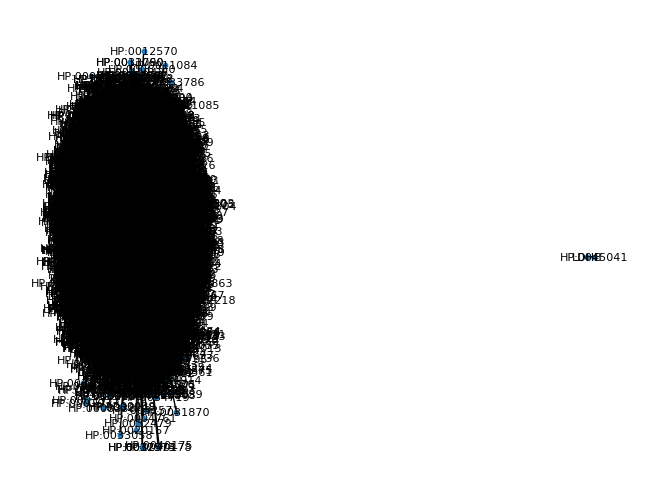

In [27]:
pos = nx.spring_layout(G)

nx.draw(G, pos, with_labels=True, node_size=10, font_size=8)
plt.show()

## Ahora crentraremos el grafo en el hp con lo nodos a dos pasos de el

Nos cerntraremos en el hpo, para crear un subgrafo.


In [33]:
target_hpo = 'HP:0010526'

# Calcular las longitudes de los caminos más cortos desde el nodo de interés
shortest_paths = nx.single_source_shortest_path_length(G, target_hpo)

# Filtrar nodos a 2 pasos o menos 
filtered_nodes2 = [node for node, distance in shortest_paths.items() if distance <= 2]

# Crear un subgrafo con los nodos filtrados
subgraph2 = G.subgraph(filtered_nodes2)



In [ ]:
# Visualizar el subgrafo
pos2 = nx.spring_layout(subgraph2)
nx.draw(subgraph2, pos2, with_labels=True, node_size=10, font_size=8)
plt.savefig('grafo_bipartito.png', dpi=300)
plt.show()

## proyeccion red de Hps

In [34]:
from networkx.algorithms import bipartite 

hpo_ids,genes  = bipartite.sets(subgraph2)

In [23]:
hpo_projection = nx.bipartite.projected_graph(subgraph2, hpo_ids )

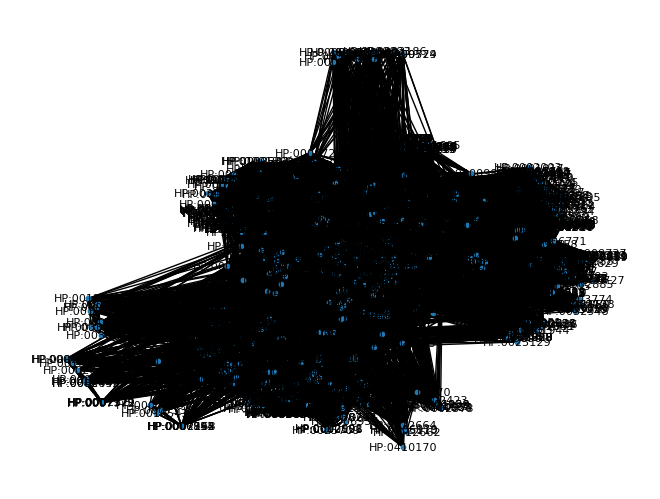

In [17]:
pos2 = nx.spring_layout(hpo_projection)
nx.draw(hpo_projection, pos2, with_labels=True, node_size=10, font_size=8)
plt.savefig('grafo_bipartito.png', dpi=300)
plt.show()

In [18]:
diametro = nx.diameter(hpo_projection)
diametro

2

In [71]:
import community 
# Ejemplo con el algoritmo Louvain
communities = community.best_partition(hpo_projection)




In [73]:
df_comunidades = pd.DataFrame(list(communities.items()), columns=['HPO_ID', 'Comunidad'])
df_comunidades

,HPO_ID,Comunidad
0,HP:0030521,0
1,HP:0011463,1
2,HP:0000787,2
3,HP:0001007,3
4,HP:0004374,0
...,...,...
1352,HP:0030257,0
1353,HP:0001265,1
1354,HP:0000105,0
1355,HP:0001287,2


In [65]:
comunidades_hpo_interes = df_comunidades[df_comunidades['HPO_ID'] == "HP:0010526"]['Comunidad'].values

for i in comunidades_hpo_interes: 
    print (i)

1


El hp de interes pertenece a la comunidad 1, vemamos que mas hps pertenecen a la comunidad 

In [69]:
hps_com1 = df_comunidades[df_comunidades['Comunidad'] == 1]['HPO_ID'].values

hps_com1

array(['HP:0011463', 'HP:0007112', 'HP:0010525', 'HP:0008762',
       'HP:0012662', 'HP:0002878', 'HP:0000007', 'HP:0012658',
       'HP:0001297', 'HP:0012671', 'HP:0002488', 'HP:0000571',
       'HP:0001285', 'HP:0004938', 'HP:0002607', 'HP:0002396',
       'HP:0002188', 'HP:0000727', 'HP:0002465', 'HP:0002300',
       'HP:0002839', 'HP:0002168', 'HP:0002442', 'HP:0002936',
       'HP:0011448', 'HP:0011695', 'HP:0030213', 'HP:0000643',
       'HP:0001347', 'HP:0000726', 'HP:0005110', 'HP:0002544',
       'HP:0030219', 'HP:0006956', 'HP:0003326', 'HP:0007158',
       'HP:0010830', 'HP:0008619', 'HP:0002185', 'HP:0007311',
       'HP:0002171', 'HP:0012332', 'HP:0010523', 'HP:0002669',
       'HP:0000925', 'HP:0012001', 'HP:0002549', 'HP:0003551',
       'HP:0009130', 'HP:0003457', 'HP:0003547', 'HP:0003676',
       'HP:0002366', 'HP:0002312', 'HP:0002070', 'HP:0002373',
       'HP:0002344', 'HP:0002073', 'HP:0034159', 'HP:0000511',
       'HP:0002450', 'HP:0001266', 'HP:0012672', 'HP:00

In [115]:

# Calcular la centralidad de intermediación de los nodos HPO
hpo_betweenness = nx.betweenness_centrality(hpo_projection)

# Imprimir la centralidad de intermediación de los nodos HPO



In [119]:
datos_combinados = {key: {'Comunidad': communities[key], 'Centralidad': hpo_betweenness[key]} for key in communities}

# Convertir el diccionario combinado a un DataFrame
df_combinado = pd.DataFrame(list(datos_combinados.items()))

# Dividir el diccionario combinado en dos columnas: 'HPO_ID', 'Valores'
df_combinado[['HPO_ID', 'Comunidad_Centralidad']] = pd.DataFrame(df_combinado[1].tolist(), index=df_combinado.index)

# Eliminar la columna no necesaria
df_combinado = df_combinado.drop(1, axis=1)

df_combinado = df_combinado.rename(columns={0: 'HPO_ID','HPO_ID': 'Comunidad','Comunidad_Centralidad': 'Centralidad'})
df_combinado = df_combinado.sort_values(by='Centralidad', ascending=False)
# ademas uniremos tambine los nombres de las enfermedades 

# Anexar la columna 'hpo_name' al DataFrame combinado
df_resultado = pd.merge(df_combinado, df[['hpo_id', 'hpo_name']], left_on='HPO_ID', right_on='hpo_id', how='left')

# Eliminar la columna adicional 'hpo_ids' (si se desea)
df_resultado = df_resultado.drop('hpo_id', axis=1)
df_resultado = df_resultado.drop_duplicates(subset=['HPO_ID'])
df_resultado

,HPO_ID,Comunidad,Centralidad,hpo_name
0,HP:0010526,1,0.025288,Dysgraphia
67,HP:0001288,1,0.021121,Gait disturbance
573,HP:0001260,1,0.020320,Dysarthria
1341,HP:0000716,1,0.019448,Depression
1884,HP:0000006,1,0.018214,Autosomal dominant inheritance
...,...,...,...,...
185646,HP:0033725,1,0.000000,Thin corpus callosum
185754,HP:0001331,4,0.000000,Absent septum pellucidum
185826,HP:0000499,4,0.000000,Abnormal eyelash morphology
185877,HP:0031908,1,0.000000,Micrographia


Dentro de los genes relacionados directamente con disgrapihia, hay alguno genes que tienen mas centralidad qeu otros, es decir, estan conectados a mas hpo. Es decir , podriamos inferir que los que tinen menos centralidad (estando concectados por uno a dysgraphia) son mas especificos afectando casi solo a dysgraphia 
- (hipotesis) - podrian ser targets en terapia genica, sileciandolos podrian mitigar la disgrafia???

In [ ]:
# Calcular el grado de los nodos HPO en la proyección
hpo_grados = hpo_projection.degree(hpo_ids)

# Imprimir los grados de los nodos HPO
print("Grados de los nodos HPO:", hpo_grados)


## proyeccion red de Genes

In [35]:
gene_projection = nx.bipartite.projected_graph(subgraph2, genes )

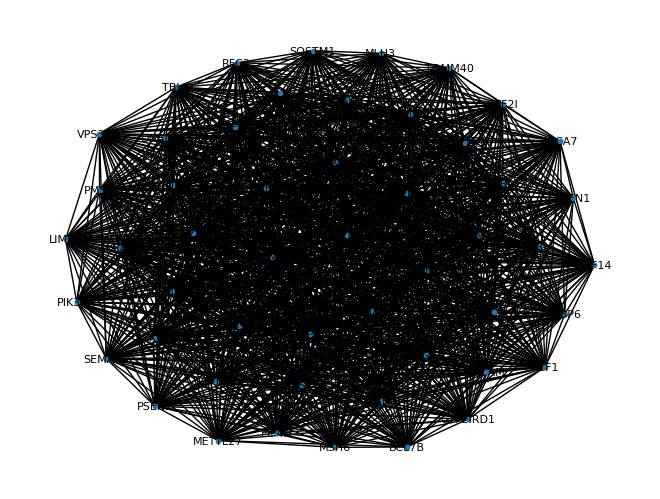

In [36]:
pos2 = nx.spring_layout(gene_projection)
nx.draw(gene_projection, pos2, with_labels=True, node_size=10, font_size=8)
plt.savefig('grafo_bipartito.png', dpi=300)
plt.show()

In [26]:
diametro = nx.diameter(gene_projection)
diametro

1